**0. Importing dependencies**

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scis


**1. Loading and understanding data**

In [44]:
raw_df = pd.read_csv(os.path.join('data', 'Churn_Modelling.csv'))

In [45]:
raw_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [46]:
raw_df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [48]:
#Printing unique values in all columns except continuous numeric columns

collist= ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

for col  in raw_df.columns:
  if col not in collist:
    print(f"{col}: {raw_df[col].nunique()} unique values") 
    print(raw_df[col].unique())
    print("-"*50)


RowNumber: 10000 unique values
[    1     2     3 ...  9998  9999 10000]
--------------------------------------------------
CustomerId: 10000 unique values
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
--------------------------------------------------
Surname: 2932 unique values
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
--------------------------------------------------
Geography: 3 unique values
['France' 'Spain' 'Germany']
--------------------------------------------------
Gender: 2 unique values
['Female' 'Male']
--------------------------------------------------
NumOfProducts: 4 unique values
[1 3 2 4]
--------------------------------------------------
HasCrCard: 2 unique values
[1 0]
--------------------------------------------------
IsActiveMember: 2 unique values
[1 0]
--------------------------------------------------
Exited: 2 unique values
[1 0]
--------------------------------------------------


In [49]:
print(raw_df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [50]:
#class distribution of the target column: 'Exited'
print(raw_df['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


**Insights:**
1. 'RowNumber', 'CustomerId' and 'Surname' columns are to dropped as they are unwanted for modelling.
2. No missing values in the dataset
3. Class imbalance identified in the target: 'Exited' (only 20.3% of churn customers)

**2.Exploratory Data Analysis (EDA)**

**Numerical Feature Analysis**

In [51]:
df = raw_df.copy()
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [52]:
# Investigating the continuous features only
con_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
df[con_features].describe()


,CreditScore,Age,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


note that the minimum and the first quartile for Balance feature are zeros. Further analysis required.

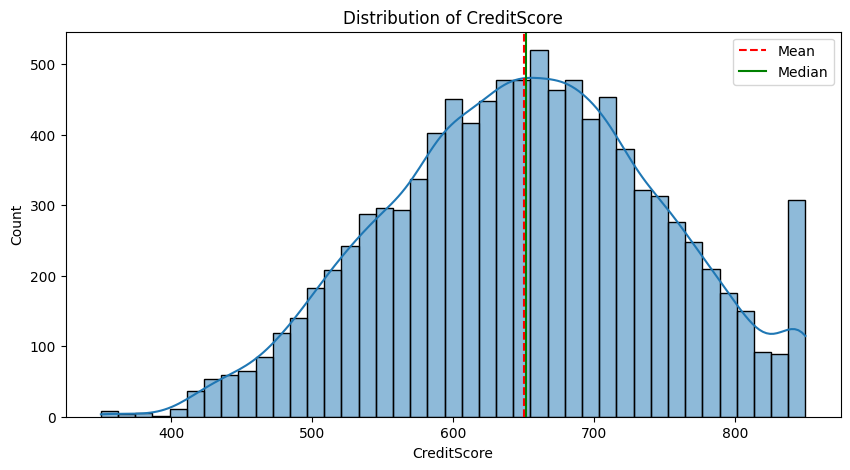

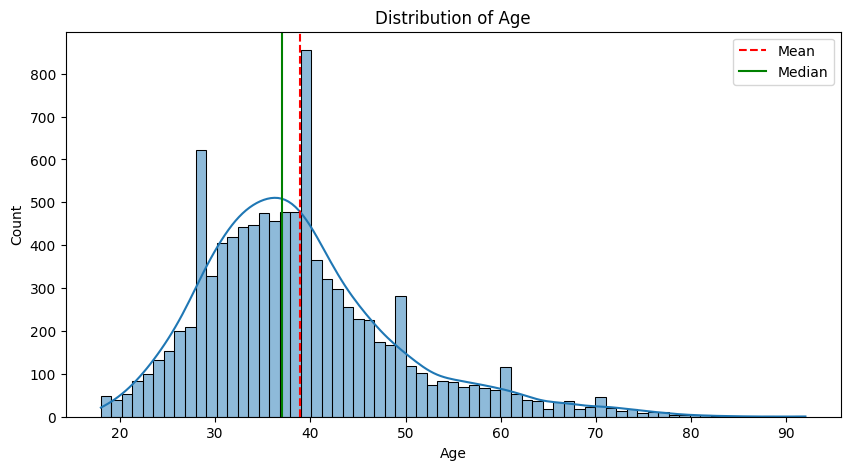

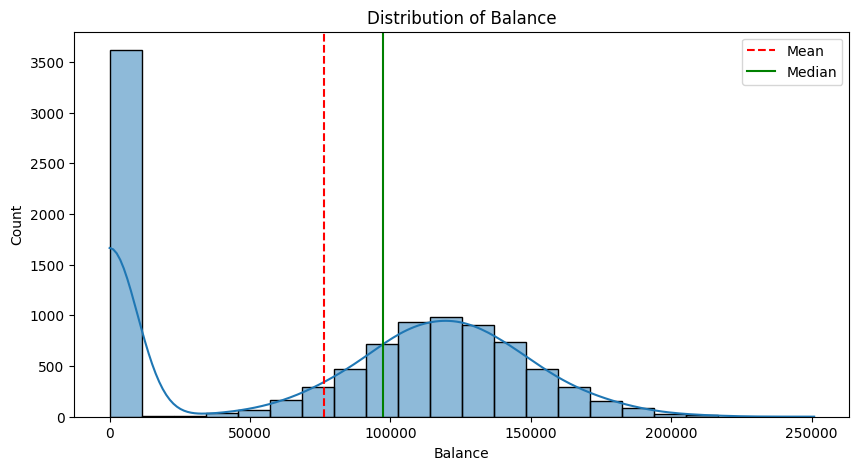

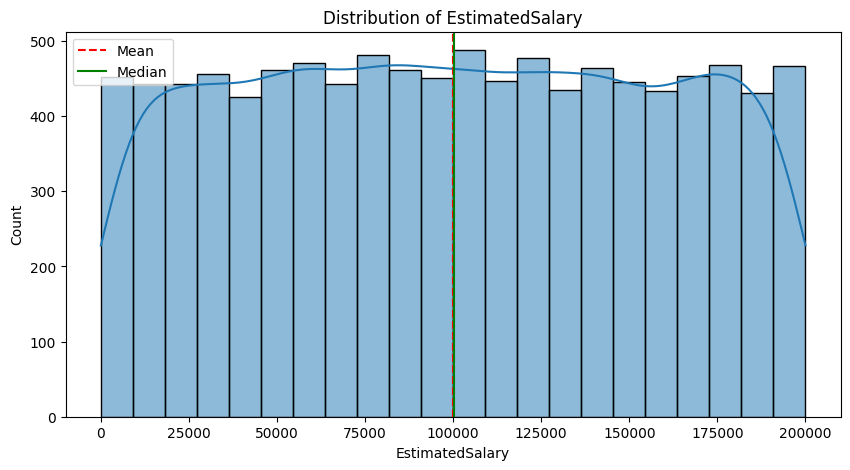

In [53]:
#Distribution plots for continuous numerical columns
def plot_histogram(df, column_name):

  plt.figure(figsize=(10, 5))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()


for col in con_features:
    plot_histogram(df, col)

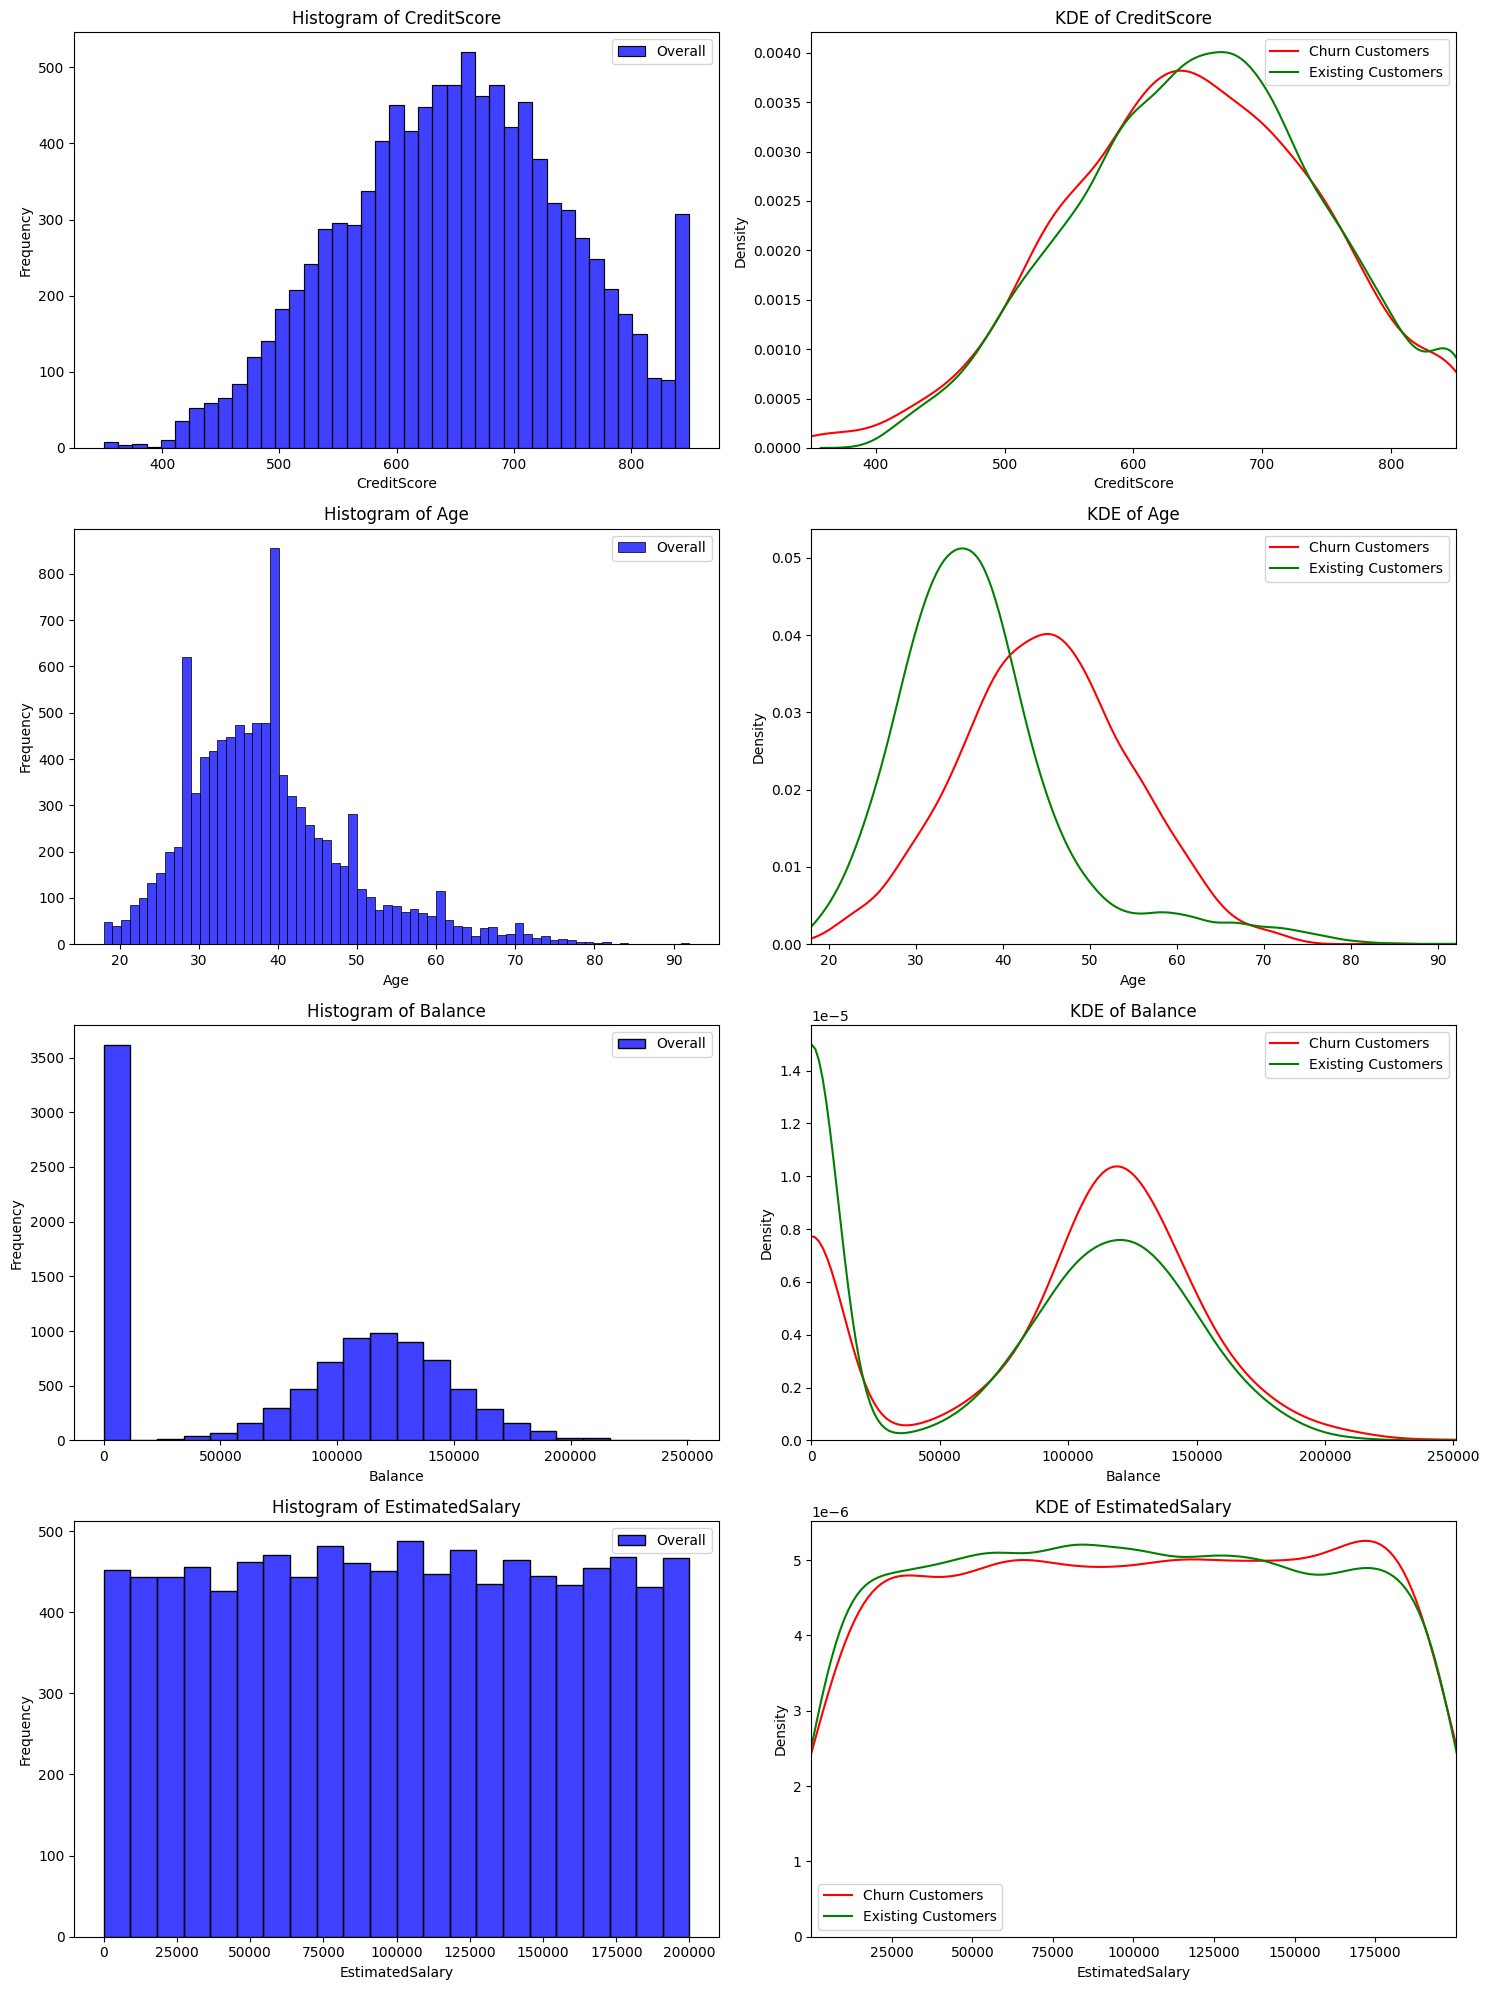

In [54]:
# investigating the continous features through plotting the histogrgram and KDE for both existing and churn customers
fig, axes = plt.subplots(len(con_features), 2, figsize=(15, 5 * len(con_features)), sharex=False, sharey=False)

for i, feature in enumerate(con_features):
    ax_hist = axes[i, 0]
    ax_kde = axes[i, 1]
    
    sns.histplot(df[feature], kde=False, color='blue', ax=ax_hist, label='Overall')
    
    ax_hist.set_title(f'Histogram of {feature}')
    ax_hist.set_xlabel(feature)
    ax_hist.set_ylabel('Frequency')
    ax_hist.legend()
    
    sns.kdeplot(df.loc[df['Exited'] == 1, feature], color='red', ax=ax_kde, label='Churn Customers')
    sns.kdeplot(df.loc[df['Exited'] == 0, feature], color='green', ax=ax_kde, label='Existing Customers')
    ax_kde.set_title(f'KDE of {feature}')
    ax_kde.set_xlabel(feature)
    ax_kde.set_ylabel('Density')
    ax_kde.legend()
    
    ax_kde.set_xlim(left=df[feature].min(), right=df[feature].max())

plt.tight_layout()
plt.show()

Age is informative in predicting churn with clear distinction in the distributions of churn and not churn customers. 

In [55]:
# AgeGroup column to check if age groups are important
bins = [0, 30, 50, 100]
labels = ['young', 'adults', 'senior']
df['AgeGroup'] = pd.cut(df['Age'], bins = bins, labels= labels, right = False)

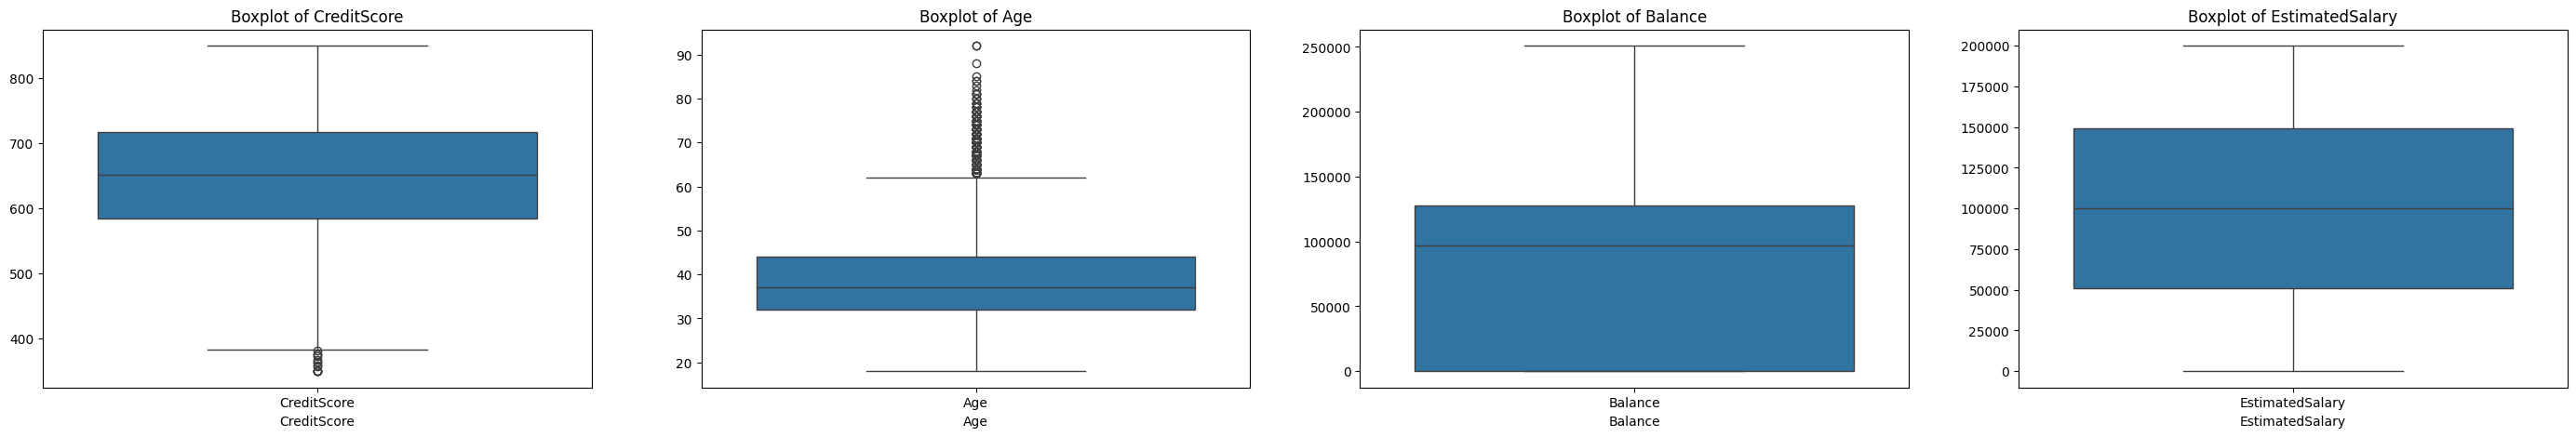

In [56]:
#Visual check for outliers in continuous features
fig, axs = plt.subplots(1, len(con_features), figsize=(35,5), sharex=False, sharey=False, )
for i, feature in enumerate(con_features):
     sns.boxplot(df[[feature]], ax=axs[i])
     axs[i].set_title(f'Boxplot of {feature}')
     axs[i].set_xlabel(feature)   


Both CreditScore and Age have data points that fall outside the whiskers. For CreditScore: below Q1-1.5*IQR. For Age: above Q3+ 1.5*IQR. Potential outliers.
EstimatedSalary and Tenure are fairly uniform features and hence have no outliers.

In [57]:
#Testing normality for the continuous features (CreditScore, Age and Balance)

features = ['CreditScore', 'Age', 'Balance']

for col in features:
    stat, p = scis.shapiro(df[col])
    print(f'Shapiro-Wilk test for {col}: statistic={stat:.3f}, p-value={p:.5f}')



Shapiro-Wilk test for CreditScore: statistic=0.994, p-value=0.00000
Shapiro-Wilk test for Age: statistic=0.944, p-value=0.00000
Shapiro-Wilk test for Balance: statistic=0.846, p-value=0.00000


c:\Users\Akhila\Desktop\lancs\LUMS\Careers\MachineLearning\End_to_End_MLProject\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


CreditScore, Age, Balance not normally distributed. Let's observe their skewness.

In [58]:
# skewness
features = ['CreditScore', 'Age', 'Balance']

for col in features:
    skew = df[col].skew()
    print(f'skewness {col}: {skew}')

skewness CreditScore: -0.07160660820092675
skewness Age: 1.0113202630234552
skewness Balance: -0.14110871094154379


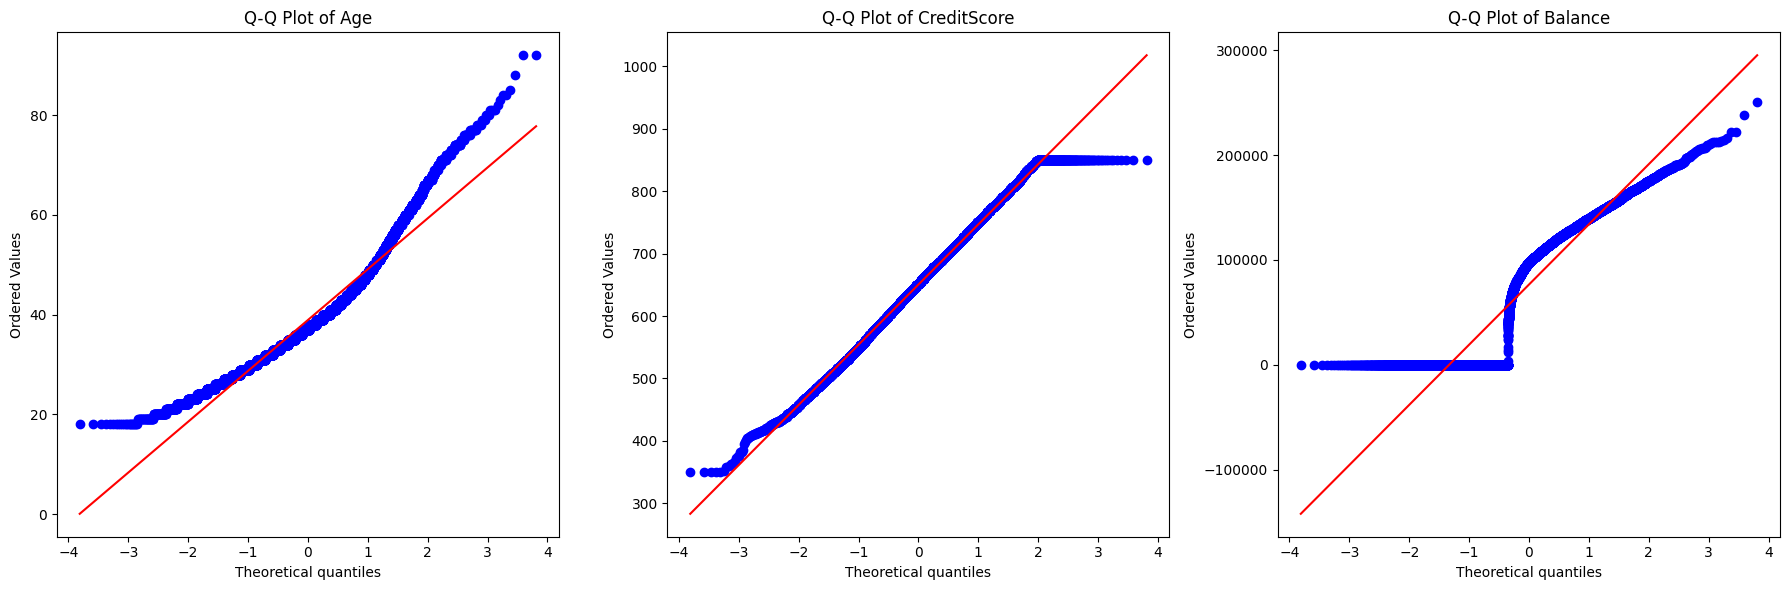

In [59]:
#Q-Q plots for normality testing

# we will check the normality for each of the 3 columns using q-q plot 
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

scis.probplot(df['Age'], dist="norm", plot=axs[0])
axs[0].set_title('Q-Q Plot of Age')

scis.probplot(df['CreditScore'], dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot of CreditScore')

scis.probplot(df['Balance'], dist="norm", plot=axs[2])
axs[2].set_title('Q-Q Plot of Balance')



plt.tight_layout()
plt.show()

Age and CreditScore are close normal distributions. Age is slighly right skewed (positive skewness). Balance feature looks like a  zero-inflated continuous variable.

<Axes: xlabel='Balance', ylabel='Count'>

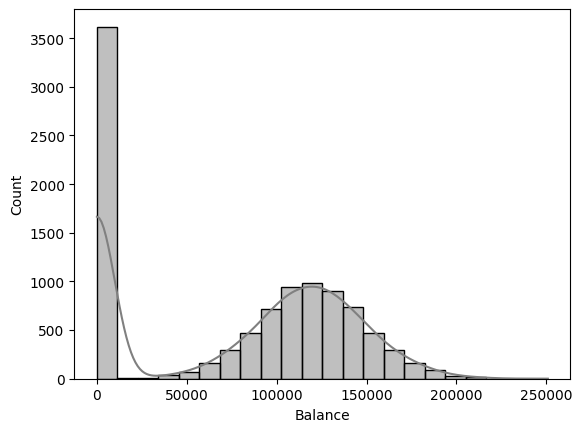

In [60]:
#Investigating Balance feature
sns.histplot(data=df, x='Balance', kde=True, color= 'grey')

Visually, Balance<50000 has a peak around 0. Balance over 50000 follows are close normal distribution. Let's slice the data around these points and visualise their influence on customers leaving the bank ('Exited').

In [61]:
#Slicing balance data into separate arrays to study the distribution in detail.    
divs = [0, 50000, 100000, 150000, 200000, 250000]
tot_customers = df.shape[0]

zero_balance_count = df[df['Balance'] == 0].shape[0]
zero_balance_perc = (zero_balance_count / tot_customers) * 100
print(f'Number of customers with a balance of 0: {zero_balance_count} ({zero_balance_perc:.2f}%)')

highest_balance_count = df[df['Balance'] > 250000].shape[0]
highest_balance_percentage = (highest_balance_count / tot_customers) * 100
print(f'Number of customers with a balance over 250000: {highest_balance_count} ({highest_balance_percentage:.2f}%)')

for i in range(len(divs) - 1):
    lower_div = divs[i]
    upper_div = divs[i + 1]
    
    count = df[(df['Balance'] > lower_div) & (df['Balance'] <= upper_div)].shape[0]
    percentage = (count / tot_customers) * 100
    print(f'Number of customers within the range {lower_div} and {upper_div}: {count} ({percentage:.2f}%)')



Number of customers with a balance of 0: 3617 (36.17%)
Number of customers with a balance over 250000: 1 (0.01%)
Number of customers within the range 0 and 50000: 75 (0.75%)
Number of customers within the range 50000 and 100000: 1509 (15.09%)
Number of customers within the range 100000 and 150000: 3830 (38.30%)
Number of customers within the range 150000 and 200000: 935 (9.35%)
Number of customers within the range 200000 and 250000: 33 (0.33%)


In [62]:
zero_bal_count = df[df['Balance']==0].groupby('Exited').Balance.count()
low_bal_count = df[(df['Balance']<=50000)&(df['Balance']>0)].groupby('Exited').Balance.count()
high_bal_count = df[df['Balance']>50000].groupby('Exited').Balance.count()

overall = df.groupby('Exited').Balance.count()

print(f'Overall customers not exited are {round(overall[0]/df.shape[0] * 100,3)}% and exited are {round(overall[1]/df.shape[0] * 100,3)}%')

print(f'Count of customers not exited the bank with balance = 0: {zero_bal_count[0]} and {round(zero_bal_count[0]/(zero_bal_count[0]+zero_bal_count[1]) *100, 3) } % of zero balance customers' )
print(f'Count of customers exited the bank with balance = 0: {zero_bal_count[1]} and {round(zero_bal_count[1]/(zero_bal_count[0]+zero_bal_count[1]) *100,3)} % of zero balance customers' )

print(f'Count of customers not exited the bank with balance between 0 and 50000 (low balance): {low_bal_count[0]} and {round(low_bal_count[0]/(low_bal_count[0]+low_bal_count[1]) *100, 3) } % of low balance customers' )
print(f'Count of customers exited the bank with balance between 0 and 50000 (low balance): {low_bal_count[1]} and {round(low_bal_count[1]/(low_bal_count[0]+low_bal_count[1]) *100,3)} % of low balance customers' )

print(f'Count of customers not exited the bank with balance  > 50000 (high balance): {high_bal_count[0]} and {round(high_bal_count[0]/(high_bal_count[0]+high_bal_count[1]) *100, 3) } % of high balance customers' )
print(f'Count of customers exited the bank with balance > 50000 (high balance): {high_bal_count[1]} and {round(high_bal_count[1]/(high_bal_count[0]+high_bal_count[1]) *100,3)} % of high balance customers' )


Overall customers not exited are 79.63% and exited are 20.37%
Count of customers not exited the bank with balance = 0: 3117 and 86.176 % of zero balance customers
Count of customers exited the bank with balance = 0: 500 and 13.824 % of zero balance customers
Count of customers not exited the bank with balance between 0 and 50000 (low balance): 49 and 65.333 % of low balance customers
Count of customers exited the bank with balance between 0 and 50000 (low balance): 26 and 34.667 % of low balance customers
Count of customers not exited the bank with balance  > 50000 (high balance): 4797 and 76.046 % of high balance customers
Count of customers exited the bank with balance > 50000 (high balance): 1511 and 23.954 % of high balance customers


In [63]:
# create new variable HasBalance to check if customers if no balance has significant impact on churn rate
df['HasBalance'] = (df['Balance']>0).astype(int)

In [64]:
# Also a balance category variable zero, low and high balance splits to check association.
df['BalanceCategory'] = df['Balance'].apply(lambda x: 'Bal_Zero' if x==0 else ('Bal_low_0_50k' if 0<x<=50000 else 'Bal_high_50k+'))

<Figure size 500x300 with 0 Axes>

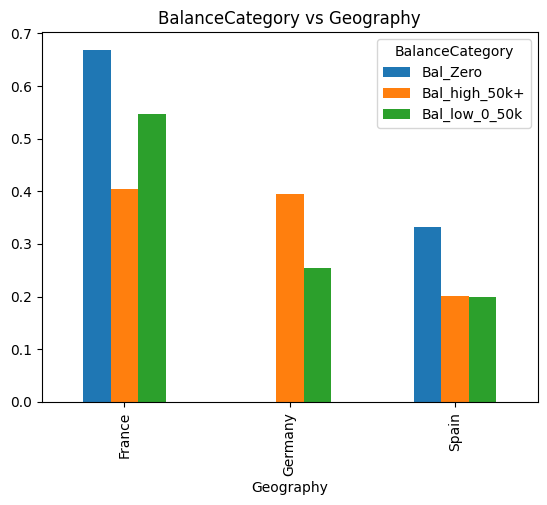

<Figure size 500x300 with 0 Axes>

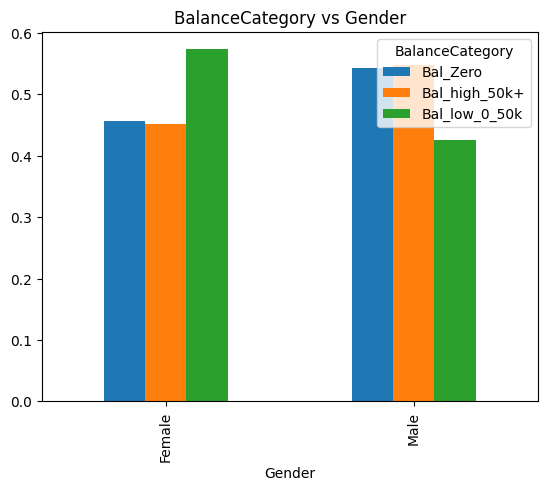

<Figure size 500x300 with 0 Axes>

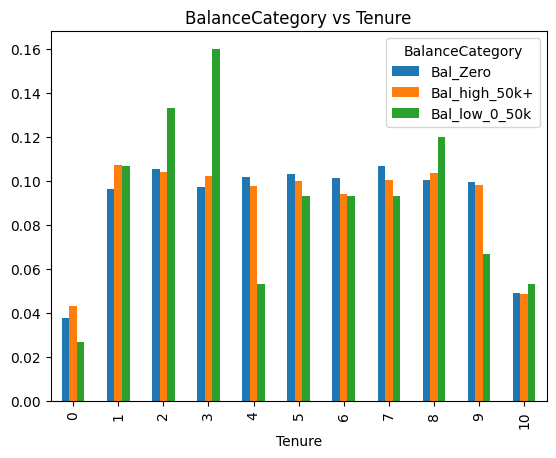

<Figure size 500x300 with 0 Axes>

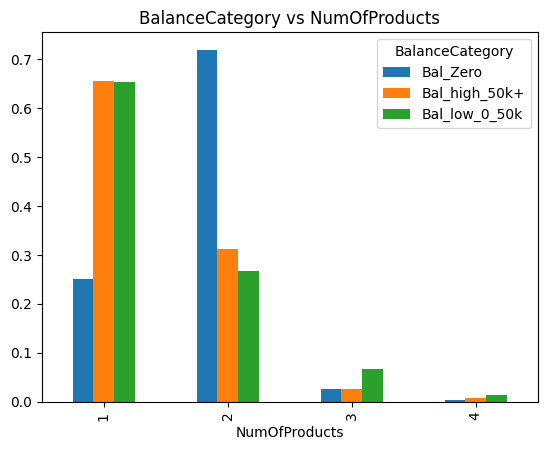

<Figure size 500x300 with 0 Axes>

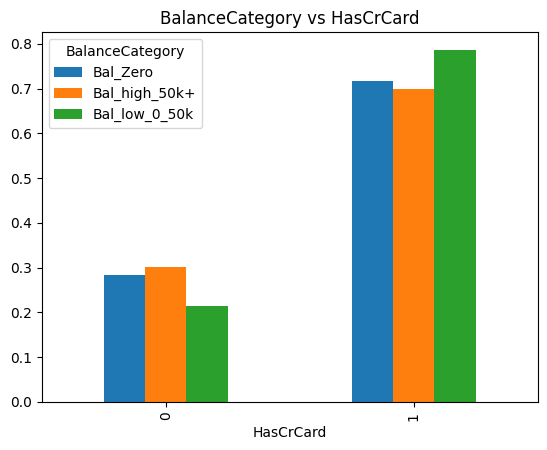

<Figure size 500x300 with 0 Axes>

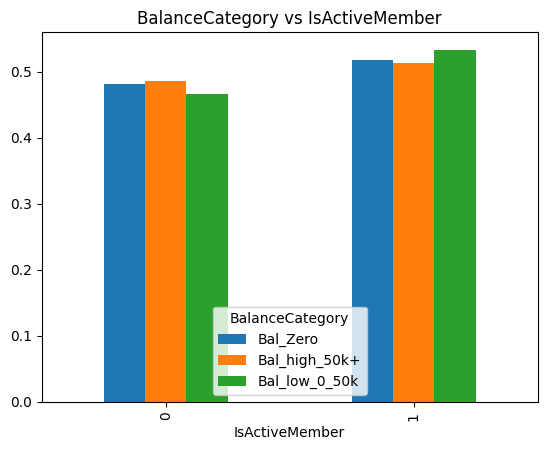

<Figure size 500x300 with 0 Axes>

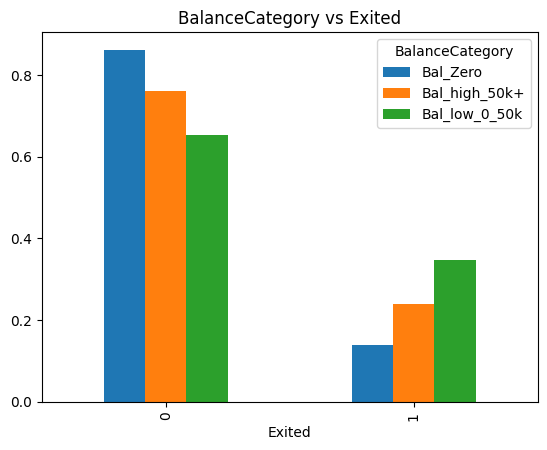

In [66]:
#Understanding discrete numerical and category columns with respect to Balance_Category
dis_num_object_cols = ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']

#df.groupby('Balance_Category')['Geography'].value_counts(normalize=True).unstack(level=0).plot.bar()
for col in dis_num_object_cols:
  plt.figure(figsize=(5, 3))
  df.groupby('BalanceCategory')[col].value_counts(normalize=True).unstack(level=0).plot.bar()
  plt.title(f"BalanceCategory vs {col}")
  plt.show()

From the above plots, new the Balance_Category column displays distinction between categories of the majority of numerical discrete and categorigal columns, making it an informative feature.

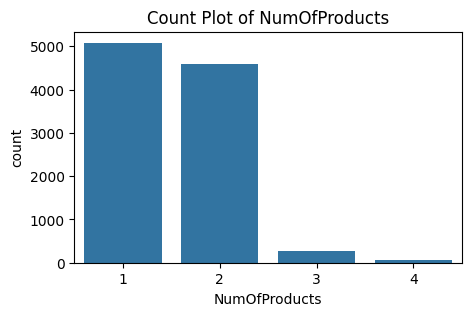

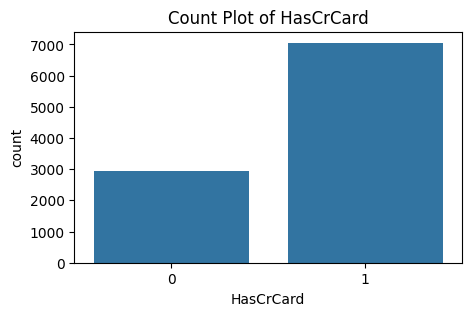

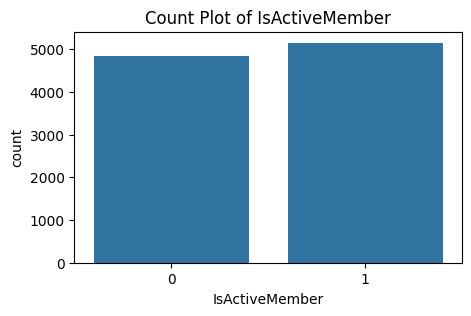

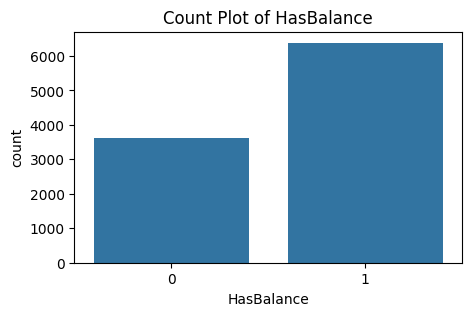

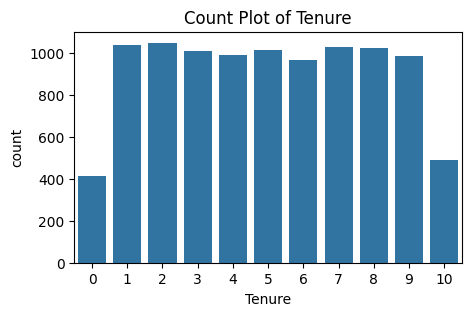

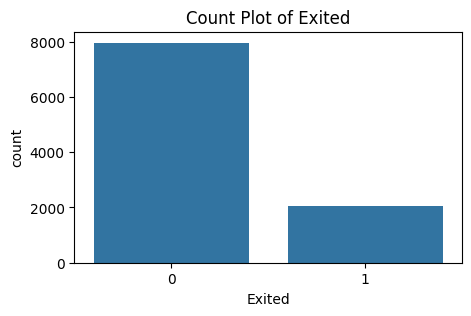

In [67]:
#Countplots for discrete numerical columns
dis_num_object_cols = ['NumOfProducts','HasCrCard','IsActiveMember','HasBalance', 'Tenure', 'Exited']
for col in dis_num_object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

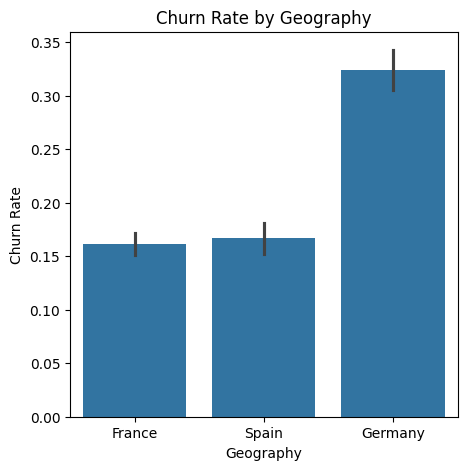

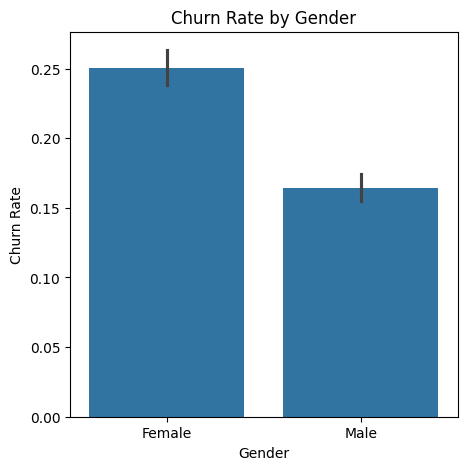

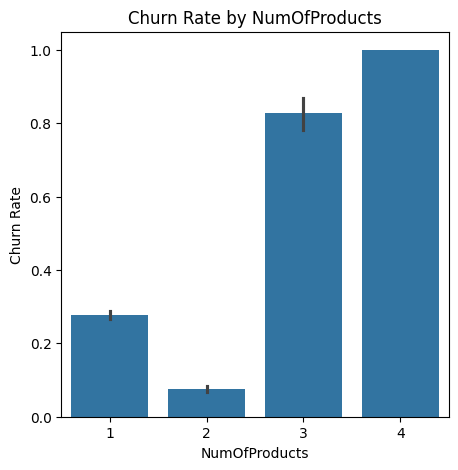

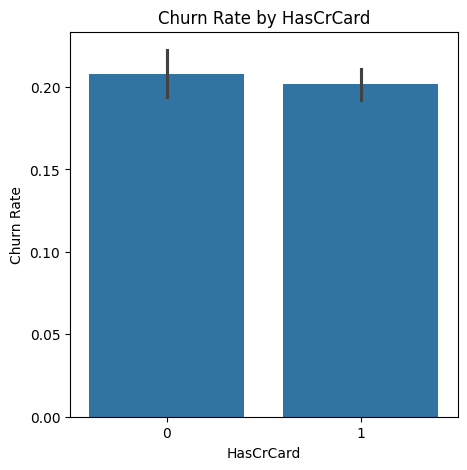

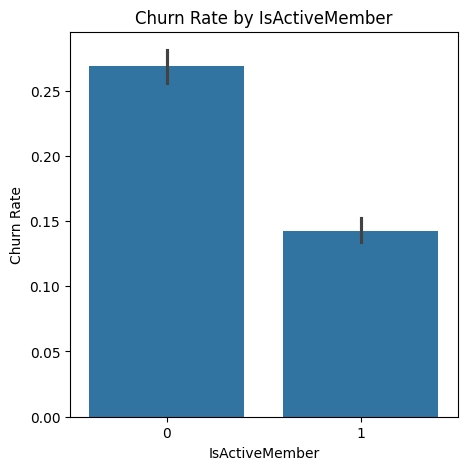

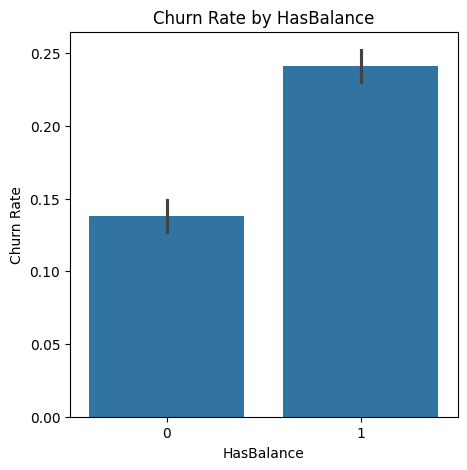

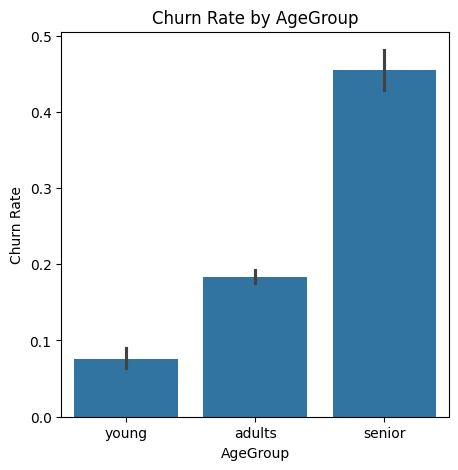

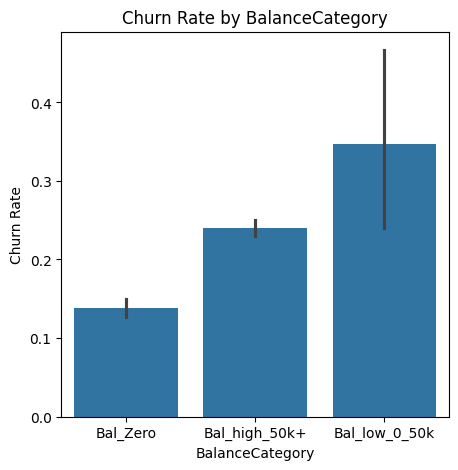

In [ ]:
# Category columns and their effect on churn rate
cat_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'HasBalance', 'AgeGroup', 'BalanceCategory']

fig, axes = plt.subplots(len(con_features), 2, figsize=(15, 5 * len(con_features)), sharex=False, sharey=False)

for i in cat_cols:


    plt.figure(figsize=(5,5))
    sns.barplot(x=df[i], y=df["Exited"])

    plt.title(f"Churn Rate by {i}")
    plt.ylabel("Churn Rate")
    plt.xlabel(i)
    plt.xticks(rotation=0)
    plt.show()

**Correlation Heatmap for numeric columns**

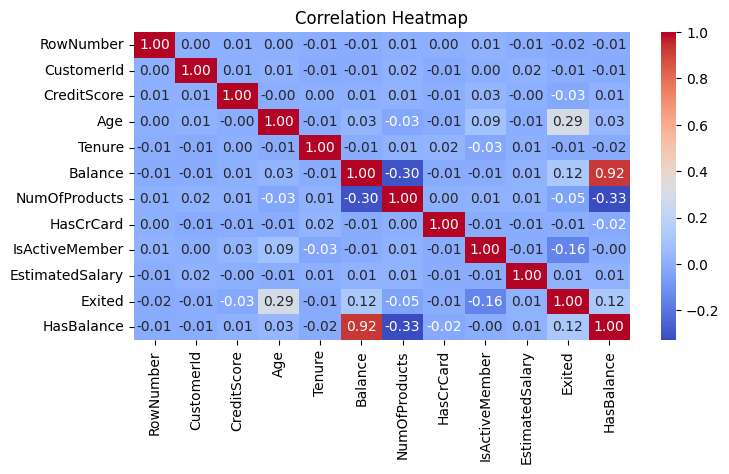

In [69]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[list(df.select_dtypes('number'))].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Akhila\AppData\Local\Temp\ipykernel_5412\1313624299.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col: df.groupby(col)["Exited"].mean()


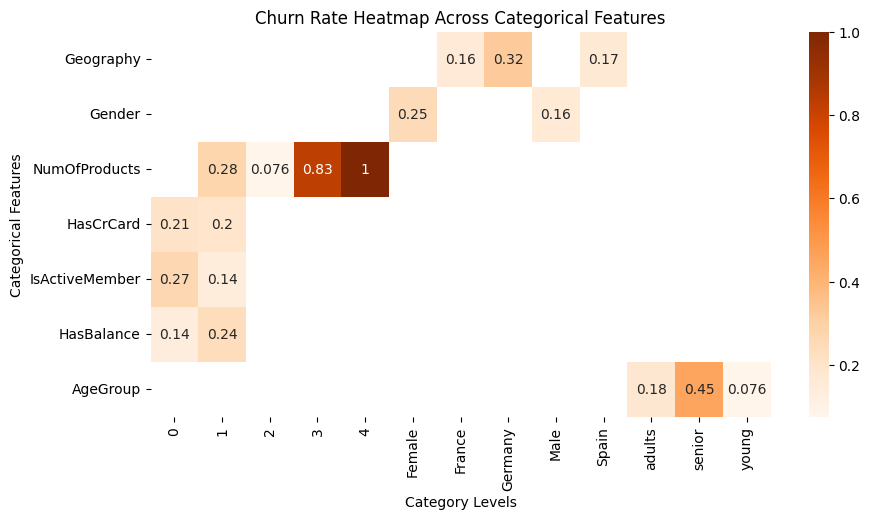

In [70]:
# churn rate heatmap across categorical features
categorical_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'HasBalance', 'AgeGroup']

heatmap_data = pd.DataFrame({
    col: df.groupby(col)["Exited"].mean()
    for col in categorical_cols
})

plt.figure(figsize=(10,5))
sns.heatmap(heatmap_data.T, annot=True, cmap='Oranges')
plt.title("Churn Rate Heatmap Across Categorical Features")
plt.xlabel("Category Levels")
plt.ylabel("Categorical Features")
plt.show()

Senior Customers, Customers owning over 3 products, Customers from France : show high churn rates. 